<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
 14  hour              210457 non-null  int32  
 15  speed             210457 non-null  float64
dtypes: float64(6), int32

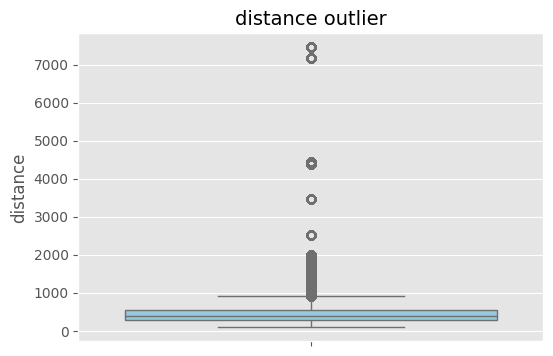

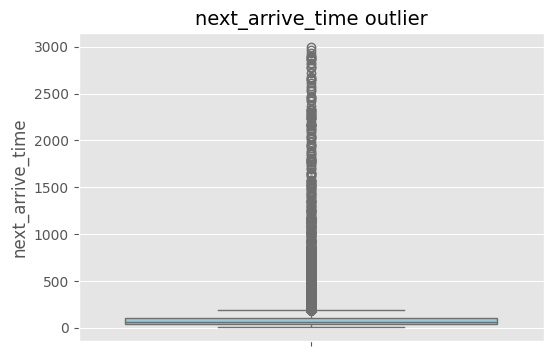

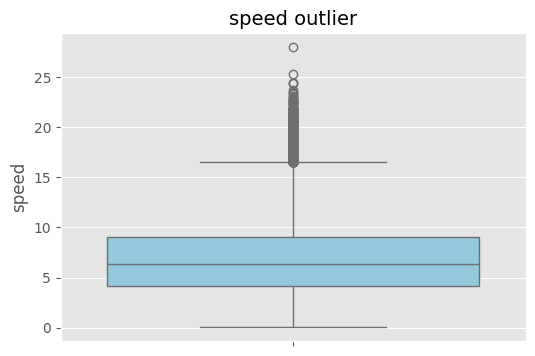

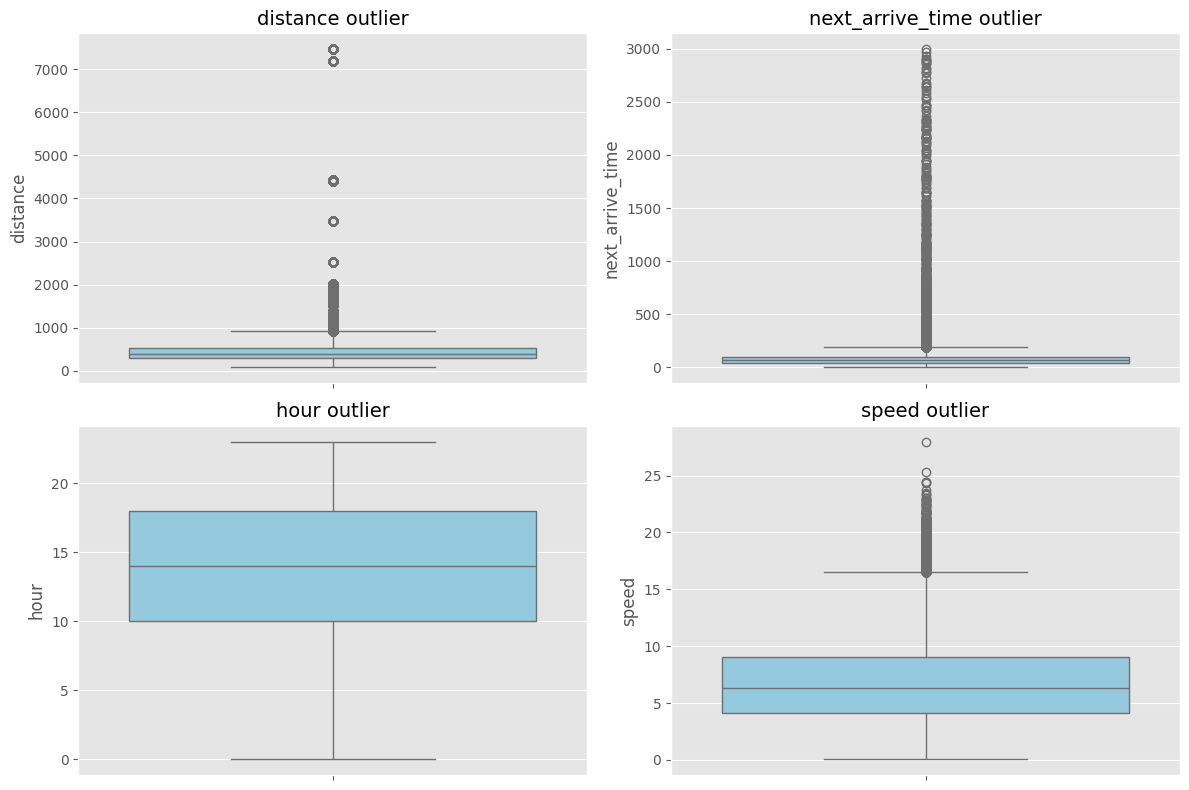

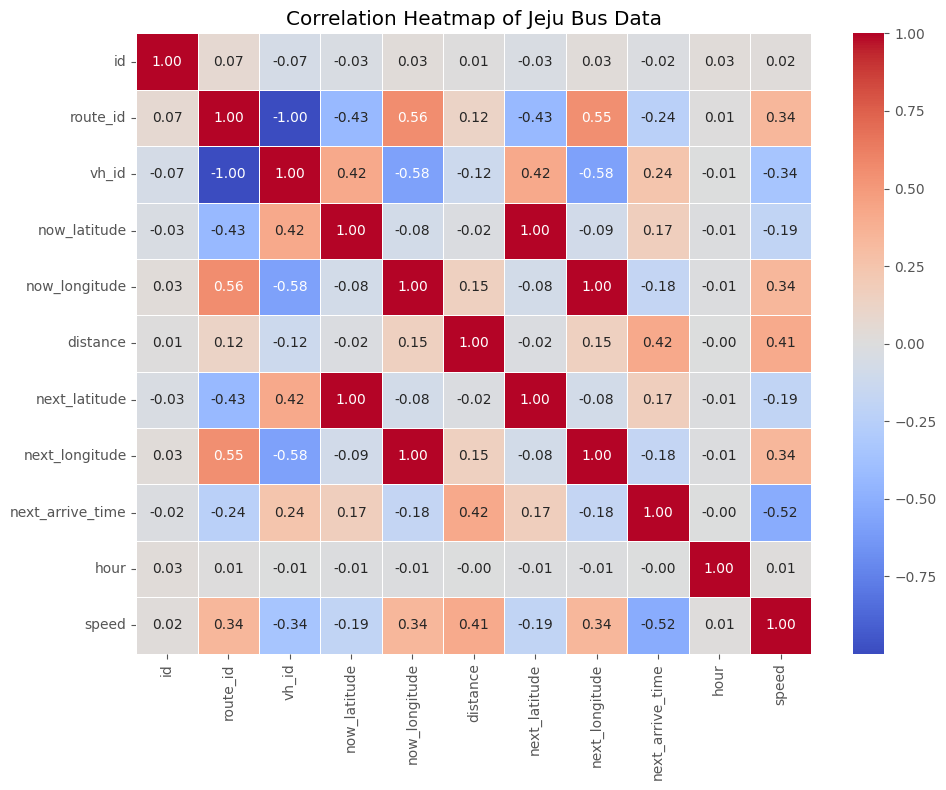

In [1]:
# pandas는 표 형태의 데이터를 쉽게 불러오고 다룰 수 있도록 도와주는 대표적인 데이터 분석 라이브러리입니다.
# 예를 들어 엑셀처럼 행과 열로 이루어진 데이터를 불러오거나, 원하는 열만 추출하거나, 평균을 구하는 등의 작업에 사용됩니다.
import pandas as pd

# train_test_split은 전체 데이터를 '학습용 데이터'와 '테스트용 데이터'로 나누어주는 함수입니다.
# 인공지능이 훈련한 결과가 실제 데이터에서도 잘 작동하는지 확인할 수 있게 도와줍니다.
from sklearn.model_selection import train_test_split

# numpy는 숫자 계산과 배열(array) 연산을 빠르게 할 수 있는 라이브러리입니다.
# 여기서는 데이터 평균, 표준편차 계산 또는 2차원 배열(행렬) 변환 등에 사용됩니다.
import numpy as np

# matplotlib는 데이터를 선 그래프, 막대 그래프 등으로 시각화할 수 있게 해주는 기본적인 시각화 도구입니다.
# 주로 간단한 그래프나 통계 시각화에 많이 사용됩니다.
import matplotlib.pyplot as plt

# seaborn은 matplotlib보다 더 예쁘고 보기 좋은 통계를 통해 그래프를 쉽게 그릴 수 있는 시각화 도구입니다.
# 막대그래프, 히트맵, 상관관계 차트 등을 간단하게 그릴 수 있습니다.
import seaborn as sns

# plotly.express는 마우스로 확대/축소하거나 호버링이 가능한 동적인(interactive) 그래프를 만들 수 있는 도구입니다.
# 예를 들어 평균 온도와 시간 관계의 막대그래프, 시간대별 히트맵 등을 시각화할 때 유용합니다.
import plotly.express as px

# plotly.io는 plotly에서 만든 그래프를 웹에서 어떻게 보여줄지를 설정할 수 있는 모듈입니다.
# 여기서는 기본 출력 모드를 'notebook_connected'로 설정해 시각화가 노트북 안에 잘 보이게 합니다.
import plotly.io as pio

# folium은 지도 위에 데이터를 시각화할 수 있게 해주는 도구입니다.
# 예를 들어 버스 정류장의 위치를 지도에 표시하거나, 두 지점 사이의 이동 경로를 선으로 나타내는 작업이 가능합니다.
import folium

# IPython.display의 display 함수는 지도나 그래프 같은 시각화 결과를 주피터 노트북 안에서 바로 보여주는 데 사용됩니다.
# 이 함수가 있어야 folium 지도의 Plotly 그래프가 실행된 후 바로 표시됩니다.
from IPython.display import display

# torch는 딥러닝 프레임워크인 PyTorch를 사용할 수 있게 해주는 핵심 라이브러리입니다.
# 신경망 모델을 만들거나 데이터를 텐서(tensor) 형태로 변환할 때 사용됩니다.
import torch

# torch.optim은 PyTorch에서 제공하는 옵티마이저(optimizer, 최적화 도구) 모듈입니다.
# 여기서는 모델이 예측을 잘하도록 가중치를 자동으로 조정하는 기능을 담당합니다.
import torch.optim as optim


# plotly 라이브러리로 만든 그래프를 어디에 보여줄지를 설정하는 코드입니다.
# 기본적으로 plotly는 웹 기반의 인터랙티브한 그래프(줌인/줌아웃, 마우스 호버 기능이 있는 그래프)를 만듭니다.

# pio는 plotly.io 모듈을 줄여서 사용하는 이름입니다.
# pio.renderers.default는 'plotly로 만든 그래프를 어떤 방식으로 출력할지'에 대한 기본 설정을 의미합니다.

# 'notebook_connected'는 주피터 노트북 환경에서 그래프를 바로 셀 안에 표시하겠다는 의미입니다.
# 이 설정을 하지 않으면 그래프가 외부 브라우저에서 열리거나, 아예 보이지 않을 수 있습니다.

# 즉, 아래 코드는 plotly 그래프가 주피터 노트북 셀 안에서 바로 보이게 만들어 줍니다.
pio.renderers.default = 'notebook_connected'

# matplotLib(맷플롯립)의 그래프 스타일(style)을 설정하는 코드입니다.
# matplotLib은 데이터를 그래프나 차트로 그려서 시각적으로 보여주는 파이썬 라이브러리입니다.

# matplotLib을 사용할 때, 다양한 그래프 스타일을 적용해서 그래프를 예쁘고 보기 좋게 만들 수 있습니다.
# 여기서 사용한 'ggplot' 스타일은 R 프로그램에서 인기 있는 시각화 도구인 ggplot2에서 사용하는 스타일입니다.
# 이 스타일을 사용하면 그래프가 더 깔끔하고 보기 좋게 표시됩니다.

# plt.style.use(스타일 이름) 함수 설명:
# - 이 함수는 matplotLib에 제공되는 여러 가지 그래프 스타일 중 원하는 스타일을 선택하여 적용합니다.
# - 스타일을 적용하면, 이후에 그리는 모든 그래프가 선택된 스타일로 표시됩니다.
# - 한 번 스타일을 적용하면, 이후 모든 그래프에 적용되며, 다른 스타일로 바꾸려면 다시 이 함수를 사용해야 합니다.

# 매개변수(parameter):
# - "ggplot": 사용할 그래프 스타일의 이름을 나타내는 문자열입니다.
#   (다른 스타일 예시: "seaborn", "default", "classic" 등도 있습니다.)

# 사용 방법 예시:
# - plt.style.use("ggplot")을 실행하면 모든 그래프가 ggplot 스타일로 변경됩니다.

# 이 코드는 matplotLib 그래프 스타일을 설정하여,
# 그래프를 볼 때 더 쉽게 데이터의 특이나 패턴을 확인할 수 있게 도와줍니다.
plt.style.use("ggplot")

# 인공지능 개발을 위해 가장 먼저 해야 할 일 중 하나는 '데이터 불러오기'입니다.
# 여기서는 'jeju_bus.csv'라는 파일에 저장된 버스 운행 데이터를 불러옵니다.

# pd.read_csv() 함수는 pandas에서 제공하는 파일 읽기 함수입니다.
# CSV 파일은 콤마(,)로 구분된 표 형식의 데이터 파일로, 엑셀과 비슷한 구조를 가지고 있습니다.

# 사용된 함수: pd.read_csv('파일이름')
# - pd: pandas 라이브러리를 줄여서 부른 이름입니다.
# - read_csv(): CSV 파일을 읽어서 '데이터프레임(DataFrame)'이라는 형태로 저장하는 함수입니다.
# - 'jeju_bus.csv': 불러올 CSV 파일의 이름입니다. 현재 같은 폴더에 있다고 가정합니다.

# 데이터프레임(df)은 표처럼 행과 열로 구성된 데이터 구조로, 이후 분석, 전처리, 시각화 등에 사용됩니다.
df = pd.read_csv("jeju_bus.csv")   # 'jeju_bus.csv' 파일을 읽어서 df라는 변수에 저장합니다.

# 불러온 데이터를 화면에 출력하여 어떤 내용이 들어있는지 확인합니다.
# df라는 변수에는 CSV 파일의 모든 데이터가 표 형태로 들어 있으며,
# 이 코드를 실행하면 그 표 전체가 화면에 표시됩니다.
df

##########################################버스 도착 시간 칼럼 추가
# 데이터프레임(df)에서 'now_arrive_time'(버스 도착 시간)이라는 열(column)의 데이터를 확인합니다.
# 데이터프레임(df)은 데이터를 행(row)과 열(column)로 나누어 저장한 표와 같은 형태입니다.
# 여기서는 특히 'now_arrive_time'이라는 열에 저장된 모든 데이터를 출력합니다.

df['now_arrive_time']

# 사용한 기능 설명:
# df['컬럼이름']: 데이터프레임에서 원하는 컬럼(열)의 모든 데이터를 선택할 때 사용합니다.
# 여기서는 'now_arrive_time'이라는 컬럼의 모든 값을 선택하여 출력합니다.

# 버스 도착 시간이 '06시', '12시'처럼 '시'라는 글자와 함께 저장되어 있습니다.
# 머신러닝(인공지능 모델)은 글자보다 숫자를 더 잘 이해하므로, 글자 형태의 시간을 숫자 형태로 바꿔줍니다.
# 예를 들어, '06시' -> '06' 으로 변경됩니다.
df['now_arrive_time'].str.replace('시', '')

# 사용한 함수 설명:
# .str.replace('기존문자', '새로운문자'): 문자열에서 특정 문자를 다른 문자로 바꾸는 함수입니다.
# - '시' 라는 글자를 빈칸('')으로 바꿔서 없애주는 작업을 합니다.

# 위에서 변환한 숫자형태의 시간이 아직 문자열('06', '12' 등)으로 되어 있습니다.
# 인공지능 모델 학습을 위해서 이 문자열을 정수형 숫자(6, 12 등)로 변환해야 합니다.
# 그래서 .astype(int)를 이용해서 문자를 정수형 숫자로 변환합니다.
df['now_arrive_time'].str.replace('시', '').astype(int)

# 사용한 함수 설명:
# .astype(자료형): 데이터를 원하는 자료형(데이터 타입)으로 바꿔주는 함수입니다.
# - 여기서는 int(정수형)로 바꾸어서 계산이나 분석이 가능한 형태로 변환합니다.

# 버스 도착 시간 정보를 숫자로 바꾸는 작업을 하고 있습니다.
# 원래 데이터에는 '06시', '08시'처럼 문자열로 되어 있습니다.
# 이 데이터를 숫자형(예: 6, 8)으로 바꿔야 머신러닝 모델이 이해할 수 있습니다.

# 사용된 코드: df['now_arrive_time'].str.replace('시', '')
# - df['now_arrive_time']: 버스가 도착하는 시간이 저장된 열(column)입니다. 예: '06시', '14시'
# - .str.replace('시', ''): '시'라는 글자를 빈 문자열('')로 바꿉니다. 즉, '06시' -> '06'이 됩니다.

# 사용된 코드: .astype(int)
# - 문자열로 된 숫자(예: '06')를 정수형 숫자(예: 6)로 바꿉니다.
# - 이렇게 해야 나중에 숫자 크기 비교나 그래프 생성, 모델 학습에 사용할 수 있습니다.

# 최종적으로 숫자로 된 시간 정보가 'hour'라는 새 열에 저장됩니다.
df['hour'] = df['now_arrive_time'].str.replace('시', '').astype(int)

df

################################버스 이동 속도 구하기
# 버스가 이동한 ‘속도’를 계산해서 새로운 열로 추가하는 코드입니다.
# 속도는 ‘거리 ÷ 시간’이라는 간단한 공식을 사용합니다.

# 사용된 코드: df['distance'] / df['next_arrive_time']
# - df['distance']: 버스가 이동한 거리입니다. 단위는 미터(m)입니다.
# - df['next_arrive_time']: 현재 정류장에서 다음 정류장까지 걸린 시간입니다. 단위는 초(s)입니다.
# - 이 둘을 나누면 속도가 계산되며 단위는 m/s(미터/초)입니다.

# 계산된 속도는 ‘speed’라는 새 열(column)으로 추가되어 나중에 분석이나 모델 입력에 사용됩니다.
df['speed'] = df['distance'] / df['next_arrive_time']

df

#############################################기본 정보 확인
# df.info() 함수는 데이터프레임의 전체 구조를 요약해서 보여주는 함수입니다.
# 예를 들어, 데이터에 어떤 열(column)이 있는지, 각 열의 데이터 타입은 무엇인지, 
# 그리고 결측값(null 또는 NaN)은 몇 개인지 등을 확인할 수 있습니다.

# 사용된 함수: df.info()
# - df: 불러온 데이터프레임 변수입니다.
# - info(): 데이터프레임의 구조를 요약해서 보여주는 pandas의 내장 함수입니다.

# 출력되는 주요 정보:
# - RangeIndex: 전체 행(row)의 개수입니다.
# - Data columns: 열(column) 수와 각 열의 이름입니다.
# - Non-Null Count: 각 열에 비어 있지 않은 값의 개수입니다.
# - Dtype: 각 열의 데이터 타입입니다. 예를 들어 int(정수), float(실수), object(문자열) 등으로 표시됩니다.
# - memory usage: 메모리 사용량입니다.

# 이 정보는 데이터에 결측값이 있는지 확인하거나, 숫자인 줄 알았는데 문자열로 지정되어 있는 오류 등을 
# 사전에 파악하는 데 유용합니다.

df.info()

#############################################데이터 확인
# df.describe() 함수는 전체 데이터를 요약 통계값으로 보여주는 함수입니다.
# 이 함수는 수치형 데이터를 대상으로 평균, 표준편차, 최소값, 최대값 등을 자동으로 계산해줍니다.
# 예를 들어, 거리(distance), 소요시간(next_arrive_time) 같은 숫자 데이터가 어떤 분포를 가지고 있는지 
# 한눈에 파악할 수 있습니다.

# 사용된 함수: df.describe()
# - df: 앞서 불러온 데이터프레임 변수입니다. (여기서는 jeju_bus.csv를 불러온 표 형태의 데이터입니다.)
# - describe(): 숫자형 컬럼들에 대해 기초 통계 요약을 출력해주는 pandas의 내장 함수입니다.

# 주요 통계 항목 설명:
# - count: 값의 개수입니다.
# - mean: 평균값입니다.
# - std: 표준편차입니다. 값들이 평균에서 얼마나 퍼져 있는지를 나타냅니다.
# - min: 최소값입니다.
# - 25%, 50%, 75%: 각 분위수입니다. 데이터를 4등분할 때의 기준점입니다.
# - max: 최대값입니다.

df.describe()

####################################버스 이상치 시각화
# 그래프의 전체 크기(가로 6인치, 세로 4인치)를 설정합니다.
# plt.figure() 함수는 차트를 그리기 전 크기와 속성을 설정하는 함수입니다.
# figsize 파라미터는 그래프의 크기를 조절할 때 사용됩니다. (단위는 인치)
plt.figure(figsize=(6, 4))

# seaborn 라이브러리의 boxplot() 함수를 사용해서 박스플롯(Boxplot)을 그립니다.
# 박스플롯은 데이터의 분포와 이상값(outlier)을 한눈에 보기 쉽게 시각적으로 표현하는 그래프입니다.
# 특히 데이터의 중앙값, 사분위수, 최대/최소값, 이상치 등을 시각적으로 파악할 수 있어 자주 활용됩니다.
# 데이터가 한쪽으로 치우쳐 있거나, 분포가 비대칭일 경우에도 유용합니다.
# sns.boxplot() 함수는 seaborn에서 제공하는 함수입니다.
# - y: 시각화할 열(컬럼), color: 그래프 색상을 지정하는 파라미터입니다.
# - 여기서는 'distance' 열을 시각화하고, 보기 좋은 하늘색('skyblue')으로 지정했습니다.
sns.boxplot(y=df['distance'], color='skyblue')

# 그래프의 제목을 'distance outlier'로 설정합니다.
# plt.title() 함수는 제목을 설정할 때 사용합니다.
# - f 문자열을 쓰면 변수 값을 넣어줄 수 있어 코드 작성 시 유용합니다.
# - fontsize: 제목 글자의 크기를 설정합니다. 여기서는 보기 좋은 크기인 14로 설정했습니다.
plt.title('distance outlier', fontsize=14)

# plt.ylabel() 함수는 y축의 이름(라벨)을 설정하는 함수입니다.
# - 그래프가 어떤 데이터를 시각화한 것인지 쉽게 알 수 있도록 도와줍니다.
plt.ylabel("distance")

# 그래프 출력
# plt.show() 함수는 지금까지 설정한 그래프를 실제로 화면에 출력합니다.
plt.show()

# 그래프의 전체 크기(가로 6인치, 세로 4인치)를 설정합니다.
# plt.figure() 함수는 차트를 그리기 전 크기와 속성을 설정하는 함수입니다.
# figsize 파라미터는 그래프의 크기를 조절할 때 사용됩니다. (단위는 인치)
plt.figure(figsize=(6, 4))

# seaborn 라이브러리의 boxplot() 함수를 사용해서 박스플롯(Boxplot)을 그립니다.
# 박스플롯은 데이터의 분포와 이상값(outlier)을 한눈에 보기 쉽게 시각적으로 표현하는 그래프입니다.
# 특히 데이터의 중앙값, 사분위수, 최대/최소값, 이상치 등을 시각적으로 파악할 수 있어 자주 활용됩니다.
# 데이터가 한쪽으로 치우쳐 있거나, 분포가 비대칭일 경우에도 유용합니다.

# 사용된 함수 설명:
# - sns.boxplot(y=데이터, color=색상)
# - y: 시각화할 열(컬럼), color: 박스플롯의 색상을 지정하는 파라미터입니다.
#   여기서는 다음 정류장까지 걸리는 시간(next_arrive_time)을 시각화했습니다.
#   색상은 보기 좋은 하늘색('skyblue')으로 지정했습니다.
sns.boxplot(y=df["next_arrive_time"], color='skyblue')

# 그래프의 제목을 'next_arrive_time outlier'로 설정합니다.

# plt.title() 함수는 제목을 설정할 때 사용됩니다.
# - 제목을 사용하면 그래프의 의미를 알 수 있도록 도와줍니다.
plt.title('next_arrive_time outlier', fontsize=14)

# plt.ylabel() 함수는 y축의 이름(라벨)을 설정하는 함수입니다.
# - 그래프가 어떤 데이터를 표현하고 있는지 알 수 있도록 도와줍니다.
plt.ylabel("next_arrive_time")

# 그래프 출력
plt.show()

# 그래프의 전체 크기(가로 6인치, 세로 4인치)를 설정합니다.
# plt.figure() 함수는 차트를 그릴 때 그 크기와 속성을 설정하는 함수입니다.
# figsize 파라미터는 그래프의 크기를 조절할 때 사용됩니다. (단위는 인치)
plt.figure(figsize=(6, 4))

# seaborn 라이브러리의 boxplot() 함수를 사용해서 박스플롯(Boxplot)을 그립니다.
# 박스플롯은 데이터의 분포와 이상값(outlier)을 한눈에 보기 쉽게 시각적으로 표현하는 그래프입니다.
# 특히 데이터의 중앙값, 사분위수, 최대/최소값, 이상치 등을 시각적으로 파악할 수 있어 자주 활용됩니다.
# 데이터가 한쪽으로 치우쳐 있거나, 분포가 비대칭일 경우에도 유용합니다.

# 사용된 함수 설명:
# sns.boxplot(y=데이터, color=색상)
# - y: 시각화할 열(컬럼), color: 박스플롯의 색상을 지정하는 파라미터입니다.
#   여기서는 버스의 이동 속도(speed) 데이터를 시각화합니다.
#   색상은 보기 좋은 하늘색('skyblue')으로 지정했습니다.
sns.boxplot(y=df["speed"], color='skyblue')

# 그래프의 제목을 'speed outlier'로 설정합니다.
# plt.title() 함수를 사용해서 그래프의 제목을 설정합니다.
# - 제목을 사용하면 그래프의 의미를 더 잘 이해할 수 있도록 도와줍니다.
plt.title('speed outlier', fontsize=14)

# plt.ylabel() 함수는 y축의 이름(축의 이름)을 명확하게 설정합니다.
# - 어떤 데이터를 나타낸 그래프인지 알 수 있도록 도와줍니다.
# 사용된 함수 설명:
# - plt.ylabel('speed'): y축 이름을 속도(speed)로 나타내므로 'speed'로 설정했습니다.
plt.ylabel("speed")

# 그래프 출력
plt.show()


########################################이상치 처리
# 데이터의 이상치(outlier)를 그래프로 확인하는 코드입니다.
# 이상치(outlier)는 통상적인 데이터의 범위를 벗어나는 값이므로,
# 분포를 왜곡해 모델의 성능을 낮추거나 잘못된 해석을 할 수 있기 때문에 꼭 확인해야 합니다.

# 먼저, 그래프로 이상치를 확인할 열(컬럼)을 정의해줍니다.
# 예를 들어 ‘distance’(거리), ‘next_arrive_time’(다음 정류장까지 걸리는 시간),
# ‘hour’(버스 도착 시간), ‘speed’(버스의 속도) 같은 열을 지정합니다.
cols_to_plot = ['distance', 'next_arrive_time', 'hour', 'speed']

# 그래프의 전체 크기(가로 12인치, 세로 8인치)를 설정합니다.
# plt.figure() 함수는 시트로 그리프를 그릴 때 그 크기와 속성을 설정하는 함수입니다.
# figsize 파라미터는 그래프의 크기를 조절할 때 사용됩니다. (단위는 인치)
plt.figure(figsize=(12, 8))

# 각 컬럼에 대해 이상치를 시각적으로 확인할 박스플롯(Box Plot)을 그려서 이상치를 시각적으로 보여줍니다.
# for문을 사용해서 cols_to_plot 리스트에 있는 컬럼들을 하나씩 그래프로 그립니다.
# enumerate(cols_to_plot, 1)은 인덱스와 값을 함께 가져오는데 주로 cols_to_plot이 ex. (1,2,3,4)를 출력해 줍니다.
# idx는 1부터 시작하며 subplot을 그릴 때 위치를 의미합니다. 1이 첫 번째부터 시작 됩니다.
for idx, col in enumerate(cols_to_plot, 1):

  # plt.subplot(2, 2, idx)는 그래프를 2줄, 2칸으로 나누어 배치하고, idx 번째에 그래프를 그립니다.
  # 즉, 한 화면에 4개의 그래프가 출력되게 됩니다.
  plt.subplot(2, 2, idx)

  # seaborn 라이브러리의 boxplot() 함수를 사용해서 박스플롯을 그립니다.
  # 박스플롯은 데이터의 분포와 이상치(outlier)를 그리기 좋게 시각적으로 표현하는 그래프입니다.
  # 이상치는 점으로 따로 표시되므로 한 눈에 확인할 수 있어 자주 활용됩니다.
  # color='skyblue'는 박스플롯의 색상입니다.
  sns.boxplot(y=df[col], color='skyblue')

  # 그래프의 제목을 설정합니다. f'{col} outlier'는 ‘컬럼명 outlier’ 형태로 표시됩니다.
  # fontsize=14는 제목 글꼴 크기를 14로 설정합니다.
  plt.title(f'{col} outlier', fontsize=14)

  # plt.ylabel() 함수는 y축(세로축)의 이름을 명확하게 설정합니다.
  # 어떤 데이터를 나타낸 그래프인지 알 수 있도록 도와줍니다.
  plt.ylabel(col)

# plt.tight_layout()은 여러 그래프가 겹치지 않고 보기 좋게 정리되도록 자동으로 간격을 조절하는 함수입니다.
plt.tight_layout()

# plt.show() 함수는 위에서 그린 그래프를 화면에 출력해줍니다.
plt.show()

# 데이터의 ‘이상치(outlier)’를 처리하는 코드입니다.
# 이상치는 데이터 중에서 일반적인 범위를 크게 벗어난, 지나치게 크거나 작은 값을 의미합니다.
# 이상치가 있으면 데이터 분석 결과가 왜곡되거나 인공지능 모델의 성능이 떨어질 수 있으므로, 이상치를 처리하는 과정이 꼭 필요합니다.

# 여기서는 ‘distance’(거리), ‘next_arrive_time’(다음 정류장까지 걸리는 시간),
# ‘hour’(버스 도착 시간), ‘speed’(버스의 속도) 4개의 컬럼(데이터 열)에 대해서 이상치를 처리할 예정입니다.
cols = ['distance', 'next_arrive_time', 'hour', 'speed']

# for 반복문을 이용해서 위의 컬럼 리스트(cols)에 있는 각 컬럼들을 하나씩 처리합니다.
for col in cols:
    
    #1사분위수(Q1), 3사분위수(Q3)를 구합니다.
    # 사분위수란 데이터를 오름차순 정렬한 후, 데이터를 4등분했을 때 각 경계값을 사분위수라고 합니다.
    # Q1(1사분위수)은 하위에서 25% 위치에 있는 값을 의미합니다.
    # Q3(3사분위수)은 하위에서 75% 위치에 있는 값을 의미합니다.
    # pandas의 quantile() 함수를 사용하여 사분위수를 구할 수 있습니다.
    # 예를 들어 0.25 를 주면 하위에서 25% 위치, 0.75 를 주면 75% 위치 값을 줄 수 있습니다.
    Q1 = df[col].quantile(0.25)  # 1사분위수 구함 (데이터 하위 25% 지점)
    Q3 = df[col].quantile(0.75)  # 3사분위수 구함 (데이터 하위 75% 지점)

    #IQR(Inter Quartile Range)을 계산합니다.
    # IQR = 3사분위수(Q3)에서 1사분위수(Q1)를 뺀 값으로, 데이터의 중간 50%에 해당하는 범위를 의미합니다.
    IQR = Q3 - Q1

    #정상적인 데이터 범위의 최소값과 최대값을 계산합니다.
    # 일반적으로 Q1 - 1.5*IQR보다 작거나, Q3 + 1.5*IQR보다 큰 값을 이상치로 판단합니다.
    lower_bound = Q1 - 1.5 * IQR  # 이상치 범위의 하한(최소)
    upper_bound = Q3 + 1.5 * IQR  # 이상치 범위의 상한(최대)

    # 이상치를 해당 범위의 값으로 클리핑(혹은 대체)합니다.
    # .clip() 함수는 값이 특정 범위를 벗어날 경우, 그 값을 제한하는 함수입니다.
    # 예를 들어 값이 lower보다 작으면 lower로, upper보다 크면 upper로 바꿉니다.
    # 이상치 값을 제거하는 것보다, 범위 안의 값으로 대체하는 것이 더 정확성에 도움됩니다.
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


############################################상관 관계 분석
# 데이터 프레임(df)에서 숫자 데이터(정수, 실수 등)만 선택하여 numeric_df에 저장합니다.
# 상관 관계나 평균값과 같은 계산은 숫자 데이터로만 가능합니다.
# 숫자가 아닌 문자열, 날짜 같은 데이터는 계산할 수 없기 때문에 제외합니다.
# 따라서 숫자 데이터만 별도로 선택해 분석하는 것입니다.

# 사용된 함수 설명:
# df.select_dtypes(include=['number']) 함수는 데이터 프레임(df)에서 특정한 데이터 타입만 선택하는 기능을 합니다.
# 여기서 데이터 타입(data type)은 숫자, 문자, 날짜 등을 구분하는 기준입니다.
# 이 함수 사용하면 데이터 프레임에서 원하는 데이터 타입만 골라낼 수 있어 매우 편리합니다.

# 파라미터 설명:
# * include=['number']: 데이터 타입 중 숫자 타입(정수형, 실수형 등)만 포함하여 선택하겠다는 뜻입니다.
# * ‘number’를 사용하면 정수와 실수 등 모든 숫자 형태의 데이터를 자동으로 선택합니다.

# 이 작업이 필요한 이유:
# 데이터 프레임은 텍스트, 숫자, 날짜 등 다양한 데이터 타입을 가지고 있습니다.
# 산점도를 작성하거나 평균값을 구할 때 숫자가 아닌 데이터가 있으면 오류가 발생합니다.
# 따라서 숫자 데이터만 추출해 놓지 않으면 계산을 할 수도 준비하는 것도 어렵습니다.

numeric_df = df.select_dtypes(include=['number'])

# 숫자 데이터만 선택한 결과를 화면에 출력하여 확인합니다.
# 이 numeric_df는 이후 분석이나 시각화, 인공지능 모델의 입력 데이터로 사용됩니다.
numeric_df

# 숫자 데이터만 있는 데이터 프레임(numeric_df)을 이용해 각 데이터 사이의 상관 관계(correlation)를 계산합니다.
# 상관 관계란 두 데이터가 서로 얼마나 관련이 있는지를 나타내는 것입니다.
# 예를 들어, "이동 거리가 클수록 도착 시간이 길어질까?" 또는 "버스 속도가 빠르면 도착 시간이 짧아질까?"와 같은 질문의 답을 찾을 때 사용합니다.
# 통계 분석에선 숫자들 간의 관계를 상관 계수(correlation coefficient)라고 부르며, -1부터 1 사이의 값을 가집니다.

# 사용된 함수 설명:
# numeric_df.corr() 함수는 데이터 프레임에 있는 숫자 컬럼 간의 상관 관계를 계산하는 함수입니다.
# 이 함수는 자동으로 데이터 프레임에 있는 모든 숫자 컬럼들의 상관 관계를 계산하여 결과를 표 형태로 만들어 줍니다.

# 상관 계수(correlation coefficient)의 의미는 다음과 같습니다:
# - 1에 가까운 값(예: 0.8, 0.9 등)은 두 데이터가 서로 같은 방향으로 강한 관계가 있음을 나타냅니다.
# - 즉, 하나의 데이터가 증가하면 다른 하나도 같이 증가하는 경향을 의미합니다.
# - -1에 가까운 값(예: -0.8, -0.9 등)은 두 데이터가 서로 반대 방향으로 강한 관계가 있음을 나타냅니다.
# - 즉, 하나의 데이터가 증가하면 다른 데이터는 감소하는 경향을 의미합니다.
# - 0에 가까운 값은 두 데이터 사이에 관련이 거의 없거나 매우 약하다는 뜻입니다.

# 이 작업이 필요한 이유:
# * 인공지능 모델을 만들 때 입력 데이터 간의 관계를 미리 알면,
#   어떤 데이터를 입력으로 사용하는 것이 더 효과적인지 판단할 수 있습니다.
# * 상관 관계가 높은 데이터들로 모델 성능에 더 정확성을 더할 수 있습니다.

corr_matrix = numeric_df.corr()

# 위에서 계산한 상관 관계 결과를 출력합니다.
# 이 결과는 표 형태로 나타나며 각 데이터 간의 관계가 얼마나 강한지 한눈에 쉽게 확인할 수 있습니다.
corr_matrix

##############################히트맵 이용 상관관계 시각화
# 그래프의 크기를 설정합니다.
# plt.figure() 함수는 그래프를 그릴 도화지의 크기와 여러가지 옵션을 설정할 수 있게 해줍니다.
# figsize 파라미터는 그래프의 가로(넓이)와 세로(높이) 크기를 정할 수 있습니다. (단위: 인치)
# 여기서는 가로 10인치, 세로 8인치 크기의 도화지를 설정합니다.
plt.figure(figsize=(10, 8))

# 상관 관계 결과를 보기 위해 히트맵(heatmap) 그래프로 표현합니다.
# 히트맵은 각 값의 크기와 색깔의 명암에 따라 숫자를 시각화한 것입니다.
# 데이터 간의 상관 관계를 색으로 표현하여 데이터 간의 관계를 한눈에 쉽게 확인할 수 있게 해줍니다.

# 사용된 함수 설명:
# sns.heatmap(): seaborn에서 제공하는 히트맵을 그리는 함수입니다.
# 히트맵을 만들기 위해 seaborn 패키지 안에서 많이 사용됩니다.

# 사용된 파라미터(parameter) 설명 정리:
# * data: 히트맵을 만들기 위한 데이터입니다. 여기서는 제주 버스 데이터의 상관 관계 결과인 corr_matrix를 사용합니다.
# * annot: True로 설정하면 각 셀에 숫자 값을 나타냅니다.
#          예를 들어, 상관 계수가 1이면 1이라는 숫자를 셀에 적고, -0.4, 1에 가까운 수들을 파란색으로 나타냅니다.
# * cmap: 색상 테마를 설정합니다. 여기서는 'coolwarm' 색상 테마를 사용했습니다.
# * fmt: 셀에 표시되는 숫자의 형식을 설정합니다. 여기서는 소수점 2자리까지 표시합니다.
# * linewidths: 셀 사이의 경계선을 얼마나 두껍게 그릴 것인지를 정합니다. 여기서는 각 구분 셀의 선을 0.5 두께로 설정합니다.

sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)

# 그래프의 제목을 설정합니다.
# plt.title() 함수는 그래프 상단에 제목을 입력해 넣어줍니다.
# 제목은 보는 사람에게 이 그래프가 무엇을 뜻하는지 알려주는 데 도움이 됩니다.
plt.title('Correlation Heatmap of Jeju Bus Data')

# 그래프의 여백 설정
# plt.tight_layout() 함수는 상하좌우 여백 조정을 자동으로 설정해줍니다.
# 이 함수는 그래프가 겹치거나 잘리는 문제를 방지해줍니다.
plt.tight_layout()

# 그래프를 최종적으로 출력합니다.
# plt.show() 함수는 위에서 그린 그래프 내용을 화면에 표시시킵니다.
plt.show()

######################################
# branca.colormap이라는 라이브러리에서 Linear(선형 컬러맵)를 가져옵니다.
# branca.colormap은 데이터의 값에 따라 색깔을 다르게 사용하도록 만들어줍니다.
# 특히 Linear는 숫자 데이터의 값이 작을수록 연한 색, 클수록 진한 색으로 표현합니다.
# 예를 들어, 데이터가 작으면 파란색, 클수록 빨간색처럼 색으로 차이를 표시하는 등의 작업을 할 수 있습니다.
from branca.colormap import LinearColormap
from branca.colormap import linear

# IPython.display 라이브러리에서 IFrame을 가져옵니다.
# IPython.display는 주피터 노트북에서 다양한 출력을 화면에 바로 보여주는 기능을 제공합니다.
# IFrame은 주피터 노트북에 외부 문서나 웹페이지나 HTML 파일을 직접 보여주는 기능입니다.
# 주로 folium으로 만든 지도를 주피터 노트북에서 볼 때 사용됩니다.
from IPython.display import IFrame

# folium 라이브러리에서 지도(Map)와 원형 마커(CircleMarker)를 가져옵니다.
# folium.Map 은 지도를 그릴 때 사용하는 클래스입니다.
# folium.CircleMarker는 지도 위에 위치에 따라 동그라미를 표시해주는 기능입니다.
# CircleMarker는 위치를 나타내는 점을 그림과 동시에, 크기나 색상으로 중요한 정보를 표현하는 데 매우 유용합니다.
from folium import Map, CircleMarker

# IPython.display 라이브러리에서 display 기능을 가져옵니다.
# display 함수는 주피터 노트북에서 데이터를 바로 화면에 보여주는 출력을 담당하는 역할을 합니다.
# folium으로 만든 지도나 시각화 결과를 주피터 노트북 셀 안에서 바로 보여줄 때 사용됩니다.
from IPython.display import display

# ipywidgets 라이브러리에서 interact 기능을 가져옵니다.
# interact는 주피터 노트북에서 슬라이더, 버튼, 박스 같은 위젯을 쉽게 만들어주는 기능입니다.
# interact를 이용하면 사용자가 직접 슬라이더를 움직이면 함수가 실행되어 데이터 시각화 결과가 바뀌는 동적 화면을 만들 수 있습니다.
from ipywidgets import interact

df[['now_latitude', 'now_longitude']]

df[['now_latitude', 'now_longitude']].sort_values(by=['now_latitude', 'now_longitude'])

df_unique = df.drop_duplicates(subset=['now_latitude', 'now_longitude'])

df_unique

df_unique = df_unique.reset_index()

df_unique

map_jeju = folium.Map(
    location=[
        df_unique['now_latitude'].mean(),
        df_unique['now_longitude'].mean()
    ],
    zoom_start=11

)

for idx in range(len(df_unique)):
    row = df_unique.loc[idx]

    # 마커 생성 및 지도에 추가
    folium.Marker(
        location=[row['now_latitude'], row['now_longitude']],
        popup=f"{row['now_station']}",
        icon=folium.Icon(icon='bus', color='blue')
    ).add_to(map_jeju)

    # 선(Polyline) 생성 및 지도에 추가
    folium.PolyLine(
        locations=[
            [row['now_latitude'], row['now_longitude']],
            [row['next_latitude'], row['next_longitude']]
        ],
        color='green',
        weight=2
    ).add_to(map_jeju)

# HTML로 저장
map_jeju.save("jeju_map.html")

from IPython.display import IFrame
IFrame("jeju_map.html", width='100%', height=800)

######################################가장 많이 정차하는 정륫ㅎ top 20
df['now_station'].value_counts()

df['now_station'].value_counts().head(20)

top20_counts = df['now_station'].value_counts().head(20)

top20_counts

top20_counts.index

top20_counts.values

df_top20_counts = df[df['now_station'].isin(top20_counts.index)]

df_top20_counts

df_top20_counts = df_top20_counts.drop_duplicates(subset=['now_station', 'now_latitude', 'now_longitude'])

df_top20_counts

df_top20_counts = df_top20_counts.merge(top20_counts.rename('count'), left_on='now_station', right_index=True)

df_top20_counts

def normalize_size(x, min_size=8, max_size=20):
    return ((x - top20_counts.min()) / (top20_counts.max() - top20_counts.min())) * (max_size - min_size) + min_size



In [2]:
colormap = linear.YlOrRd_09.scale(top20_counts.min(), top20_counts.max())
colormap.caption = "정류장 정차 횟수 (TOP 20)"
map_jeju = folium.Map(
    location=[df_top20_counts['now_latitude'].mean(), df_top20_counts['now_longitude'].mean()],
    zoom_start=11,
    width='100%',
    height='800px'
)

#for 반복문을 사용해서 상위 20개 정류장에 대해 지도에 원 마커(CircleMarker)를 추가합니다.
#df_top20_counts.iterrows()는 데이터프레임의 각 행(row)을 순서대로 하나씩 가져오는 반복문입니다.
#변수 row는 현재 정류장 한 개에 대한 정보를 담고 있습니다.
for _, row in df_top20_counts.iterrows():

    #folium.CircleMarker()는 지도 위에 원 모양 마커를 표시하는 함수입니다.
    #이 마커는 단순한 정보만 전달도 많이 들어올 수 있어서 시각적으로 유용합니다.

    # 매개변수 설명:
    # - location: 원 마커를 표시할 위치입니다. [위도, 경도] 형식으로 입력합니다.
    # - radius: 원의 반지름입니다. 정류장 수에 따라 크기를 조절하기 위해 normalize_size() 함수를 계산한 값을 사용합니다.
    # - popup: 마커를 클릭했을 때 표시되는 정보입니다. 정류장 이름과 횟수를 함께 표시합니다.
    # - tooltip: 마우스를 올렸을 때 뜨는 말풍선입니다. 정류장 이름을 표시합니다.
    # - color: 원의 테두리 색입니다. colormap() 함수에 정류장 수를 넣어서 자동으로 색을 정합니다.
    # - fill: 내부 채우기 여부입니다. True로 설정하면 내부 색 채워집니다.
    # - fill_color: 내부 채우기 색상입니다. 위에서 만든 colormap으로 지정합니다.
    # - fill_opacity: 채우기 색의 투명도입니다. 0.0은 완전 투명, 1.0은 완전 불투명입니다. 여기서는 0.7로 설정하였습니다.

    folium.CircleMarker(
        location=[row['now_latitude'], row['now_longitude']],
        radius=normalize_size(row['count']),
        popup=f"{row['now_station']}<br>정차 횟수 : {row['count']}",
        tooltip=row['now_station'],
        color=colormap(row['count']),
        fill=True,
        fill_color=colormap(row['count']),
        fill_opacity=0.7
    ).add_to(map_jeju)
#위에서 만든 색상 컬러맵(colormap)을 지도 아래에 범례로 추가합니다.
#사용자(또는 분석가)가 색깔의 의미를 쉽게 이해할 수 있도록 도와줍니다.
colormap.add_to(map_jeju)

#완성된 지도를 HTML 파일로 저장합니다.
#저장된 파일은 웹 브라우저에서 열어볼 수 있으며, 공유도 가능합니다.
#파일 이름은 'bus_stop_count.html' 입니다.
map_jeju.save("bus_stop_count.html")

IFrame("bus_stop_count.html", width='100%', height=800)

In [4]:
###############################################시간대별 정류장 시각화
#버스 정류장 데이터에서 중복되는 정류장을 제거하고 새로운 데이터프레임(df_unique)을 만듭니다.
#중복 제거 기준은 '정류장 이름(now_station)', '위도(now_latitude)', '경도(now_longitude)', '시간(hour)'입니다.
#같은 시간대, 같은 위치의 정류장이 여러 번 기록되었더라도 하나만 남기고 제거합니다.
#이렇게 하면 나중에 시간별로 정류장을 지도에 시각화할 때 겹치지 않게 표시할 수 있습니다.
df_unique = df.drop_duplicates(subset=['now_station', 'now_latitude', 'now_longitude', 'hour'])

#중복이 제거된 데이터프레임을 확인합니다.
df_unique

pd.pivot_table(df_unique,
               index=['hour', 'now_station'],
               values='now_latitude',
               aggfunc='count')

pd.pivot_table(df_unique,
               index=['hour', 'now_station'],
               values='now_latitude',
               aggfunc='count')

pd.pivot_table(df_unique,
               index=['hour', 'now_station'],
               values='now_latitude',
               aggfunc='count').reset_index()

pd.pivot_table(df_unique,
               index=['hour', 'now_station'],
               values='now_latitude',
               aggfunc='count').reset_index().rename(columns={'now_latitude' : 'count'})

station_pivot = pd.pivot_table(df_unique,
                                index=['hour', 'now_station'],
                                values='now_latitude',
                                aggfunc='count').reset_index().rename(columns={'now_latitude': 'count'})

station_pivot

# 시각화 함수 정의입니다.
# 이 함수는 사용자가 슬라이더로 선택한 시간(hour)에 해당하는 버스 정류장을 지도에 표시해주는 역할을 합니다.
def plot_hourly_map(selected_hour):
    # 선택된 시간대(예: 오전 7시)에 해당하는 버스 정류장 정보만 골라냅니다.
    # df_unique는 중복 정류장이 제거된 데이터이며, 'hour' 열은 정수형 시간 값입니다 (예: 6, 7, 8).
    # 이 필터링 작업은 해당 시간대에 어떤 정류장이 사용되었는지 확인하는 데 필요합니다.
    hour_data = df_unique[df_unique['hour'] == selected_hour]

    # folium을 사용해서 지도를 생성합니다.
    # folium.Map() 함수는 지도를 새로 만드는 기능입니다.
    # location 매개변수는 지도 중심을 나타내는 위도(latitude)와 경도(longitude)의 평균값을 넣습니다.
    # zoom_start는 지도 확대 정도를 설정하며, 값이 클수록 더 가까이 확대됩니다.
    # width, height는 지도의 가로/세로 크기를 설정합니다.
    m = folium.Map(
        location=[df['now_latitude'].mean(), df['now_longitude'].mean()],
        zoom_start=11,
        width='100%',
        height='800px'
    )

    # 시간대에 해당하는 모든 정류장 위치를 지도에 표시합니다.
    # for문을 사용하여 hour_data에 있는 각 행(row)을 하나씩 꺼냅니다.
    # folium.Marker() 함수는 지도 위에 아이콘 모양 마커(핀)를 찍는 역할을 합니다.
    for _, row in hour_data.iterrows():
        folium.Marker(
            location=[row['now_latitude'], row['now_longitude']],  # 📍 마커의 위치를 위도와 경도로 지정합니다.
            popup=row['now_station'],                               # 💬 마커를 클릭하면 정류장 이름이 표시됩니다.
            tooltip=row['now_station'],                             # 💬 마우스를 올렸을 때 정류장 이름이 툴팁으로 뜹니다.
            icon=folium.Icon(
                icon='bus',                                         # 🚌 마커 아이콘을 버스 모양으로 설정합니다.
                prefix='fa',                                        # 'fa'는 폰트어썸(FontAwesome) 아이콘을 사용하겠다는 설정입니다.
                color='blue'                                        # 마커 색깔을 파란색으로 지정합니다.
            )
        ).add_to(m)  # 📌 생성된 마커를 지도 객체 m에 추가합니다.
        
    # 완성된 지도를 HTML 파일로 저장합니다.
    # 예: hour_07_stations.html 같은 이름으로 저장됩니다.
    map_file = f"hour_{selected_hour:02d}_stations.html"
    m.save(map_file)
    
    # 저장된 HTML 지도를 노트북 화면에 표시합니다.
    # IFrame은 지도 파일을 웹 페이지처럼 삽입하는 기능입니다.
    display(IFrame(map_file, width='100%', height='800px'))

# 슬라이더 위젯을 사용하여 사용자가 시간(hour)을 선택할 수 있도록 합니다.
# interact() 함수는 사용자가 슬라이더로 선택한 값(selected_hour)을 자동으로 함수(plot_hourly_map)에 전달해줍니다.
# 예: 사용자가 슬라이더에서 8을 선택하면 plot_hourly_map(8)을 실행합니다.
interact(plot_hourly_map, selected_hour=(0, 23))

interactive(children=(IntSlider(value=11, description='selected_hour', max=23), Output()), _dom_classes=('widg…

<function __main__.plot_hourly_map(selected_hour)>

In [5]:
df

# 인공지능 모델의 입력으로 사용할 데이터를 X에 저장합니다.
# 이 데이터는 '현재 위도(now_latitude)', '현재 경도(now_longitude)', '거리(distance)',
# '다음 정류장 위도(next_latitude)', '다음 정류장 경도(next_longitude)', '시간(hour)', '속도(speed)'
# 를 포함합니다.

X = df[[
    "now_latitude", 'now_longitude', 'distance',
    'next_latitude', 'next_longitude', 'hour', 'speed'
]]

# X 데이터를 화면에 출력하여 제대로 선택되었는지 확인합니다.
X

# X 데이터의 각 열(변수)별 평균을 계산하여 X_mean에 저장합니다.
# 평균(mean)은 데이터를 대표하는 하나의 값으로, 모든 값을 더한 후 개수로 나눈 값입니다.
X_mean = X.mean()

# 계산된 X 데이터 평균을 화면에 출력합니다.
X_mean

# X 데이터의 각 열별 표준편차를 계산하여 X_std에 저장합니다.
# 표준편차(std)는 데이터가 평균을 기준으로 얼마나 퍼져있는지를 나타내는 값입니다.
X_std = X.std()

# 계산된 X 데이터 표준편차를 화면에 출력합니다.
X_std

# 데이터의 표준화(Standardization)를 진행합니다.
# 표준화는 데이터의 평균이 0, 표준편차가 1이 되도록 만들어주는 과정입니다.
# 표준화 수식: (원래 값 - 평균) / 표준편차
X_scaled = (X - X_mean) / X_std

# 표준화된 X 데이터를 화면에 출력하여 변환된 결과를 확인합니다.
X_scaled

# 인공지능 모델이 예측할 목표값(정답 데이터)을 y에 저장합니다.
# 예측하려는 값은 '다음 정류장까지 걸리는 시간(next_arrive_time)'입니다.
y = df[['next_arrive_time']]

# y 데이터를 화면에 출력하여 목표값이 제대로 선택되었는지 확인합니다.
y

# y 데이터프레임을 "next_arrive_time"(버스가 다음 정류장에 도착하는 데 걸리는 시간) 칼럼의 값을 기준으로 정렬하는 코드입니다.
# sort_values() 함수는 특정 열의 값을 기준으로 데이터프레임을 정렬할 때 사용하는 판다스(pandas)의 함수입니다.
# 매개변수(by): 어떤 열(column)을 기준으로 정렬할지 정해줍니다. 여기서는 'next_arrive_time' 칼럼을 기준으로 정렬합니다.
# 매개변수(ascending): 정렬의 방향을 정합니다.
#   - ascending=False로 설정하면 내림차순(큰 값 -> 작은 값)으로 정렬합니다.
#   - 예를 들어 도착시간이 긴 데이터부터 짧은 데이터 순으로 정렬됩니다.
# 이 작업을 통해 시간이 가장 오래 걸리는 데이터부터 순서대로 쉽게 확인할 수 있습니다.
y.sort_values(by="next_arrive_time", ascending=False)

# y 데이터의 평균을 계산하여 y_mean에 저장합니다.
# 이는 목표 데이터(정답값)의 평균을 의미합니다.
y_mean = y.mean()

# 계산된 y 데이터의 평균을 화면에 출력합니다.
y_mean

# y 데이터의 표준편차를 계산하여 y_std에 저장합니다.
y_std = y.std()

# 계산된 y 데이터의 표준편차를 화면에 출력합니다.
y_std

# y 데이터도 표준화를 진행합니다.
# 목표 데이터도 평균이 0, 표준편차가 1이 되도록 만듭니다.
y_scaled = (y - y_mean) / y_std

# 표준화된 y 데이터를 화면에 출력하여 확인합니다.
y_scaled

# 데이터를 '학습 데이터(X_train, y_train)'와 '테스트 데이터(X_test, y_test)'로 나누는 과정입니다.
# 인공지능 모델은 전체 데이터를 사용해 학습을 하는 것이 아니라,
# 일부는 모델을 훈련(학습)하는 데 사용하고 나머지 일부는 모델이 얼마나 잘 학습되었는지 평가하는 데 사용합니다.

# 사용하는 함수는 train_test_split 입니다.
# train_test_split은 데이터를 두 부분으로 나눠주는 기능을 하는 scikit-learn의 함수입니다.
# 주로 데이터를 분할하여 인공지능 모델을 만들 때 사용됩니다.

# train_test_split 함수의 매개변수(설정값)에 대해 설명합니다.
# 매개변수(parameter)를 잘못 넣을 경우 동일한 코드라도, 이럴 때마다 학습의 동작 방식도 달라집니다.
# - 첫 번째 매개변수 (X_scaled): 입력 데이터입니다. 표준화된 입력값(X_scaled)을 사용합니다.
# - 두 번째 매개변수 (y_scaled): 목표 데이터입니다. 표준화된 목표값(y_scaled)을 사용합니다.
# - test_size=0.2: 테스트 데이터의 크기를 의미합니다.
#   → 0.2는 전체 데이터의 20%를 테스트 데이터로 사용하고, 나머지 80%를 학습 데이터로 사용하겠다는 뜻입니다.
# - random_state=42: 데이터를 나눌 때 사용하는 난수(무작위 수) 생성기의 시드(seed)입니다.
#   → 매번 같은 데이터로 생성하기 위해 넣는 것으로, 결과의 재현 가능성(매번 같은 결과를 얻을 수 있도록)을 위해 사용됩니다.

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# X_train은 인공지능 모델을 학습시킬 때 입력으로 사용되는 데이터입니다.
# 전체 데이터의 80%에 해당하며, 모델이 이 데이터를 통해 학습합니다.
X_train

# X_test는 인공지능 모델의 성능을 평가할 때 사용하는 입력 데이터입니다.
# 모델이 처음 보는 새로운 데이터이며, 전체 데이터의 20%에 해당합니다.
X_test

# y_train은 인공지능 모델을 학습시킬 때 사용하는 정답(목표값) 데이터입니다.
# X_train과 같은 비율로 나누어지며, 입력 X_train의 정답이 됩니다.
y_train

# y_test는 인공지능 모델의 성능을 평가할 때 사용되는 실제 정답 데이터입니다.
# 모델이 X_test 입력 데이터를 통해 예측한 값과 비교하여 얼마나 정확한지 평가합니다.
y_test

# 파이토치(PyTorch)의 텐서(tensor)로 데이터를 변환하는 과정입니다.
# 텐서(tensor)는 파이토치에서 데이터를 다룰 때 사용하는 특별한 형태의 데이터입니다.
# 쉽게 말해, 텐서는 파이토치에서 숫자를 효율적으로 계산하기 위해 데이터 저장소입니다.
# 이 과정이 필요한 이유는 인공지능 모델이 텐서 형태로 입력 데이터를 받기 때문입니다.

# torch.tensor() 함수 설명:
# torch.tensor()는 리스트, 배열 또는 판다스 데이터 등을 텐서로 바꾸는 함수입니다.
# 이 함수는 인공지능 모델 학습을 위해 꼭 필요합니다.

# torch.tensor()의 매개변수(parameter):
# - 첫 번째 매개변수(X_train.values 또는 y_train.values): 변환할 데이터입니다.
#   판다스(pandas)의 데이터프레임은 .values를 사용하면 넘파이(numpy) 배열 형태로 바꿔줄 수 있습니다.
# - dtype=torch.float32: 텐서 내부의 데이터 형식을 지정합니다.
#   torch.float32는 실수(소수점을 포함한 숫자)를 저장할 때 사용하는 데이터 타입입니다.

# 학습 데이터 X_train(모델 입력 데이터)을 텐서로 변환합니다.
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)

X_train_tensor

# 테스트 데이터 X_test(모델 평가에 사용될 입력 데이터)를 텐서로 변환합니다.
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

X_test_tensor

# 학습 데이터 y_train(정답 데이터)을 텐서로 변환합니다.
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

y_train_tensor

# 테스트 데이터 y_test(모델 평가에 사용될 정답 데이터)를 텐서로 변환합니다.
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

y_test_tensor

# input_dim이라는 변수에 입력 데이터(X_train)의 열(column) 개수를 저장합니다.
# 인공지능 모델이 입력 데이터의 크기를 미리 알아야 학습을 할 수 있기 때문입니다.
# X_train_tensor.shape[1]에서 shape는 데이터의 모양을 알려주는 속성입니다.
# shape[1]는 데이터의 열(column)의 개수를 의미합니다.
# 예를 들어 데이터가 100개의 행(row)과 7개의 열(column)로 구성되었다면, shape는 (100, 7)이 되고 shape[1]은 7이 됩니다.
input_dim = X_train_tensor.shape[1]

# input_dim 값을 출력해서 입력 데이터의 크기(특성 개수)를 확인합니다.
input_dim

# 선형 회귀 모델을 생성하는 코드입니다.
# 선형 회귀 모델이란 입력 데이터를 이용해서 연속적인 숫자(예를 들어, 도착 시간)를 예측하는 가장 기본적인 인공지능 모델입니다.
# 입력값과 출력값 사이의 관계를 가장 잘 설명하는 직선을 찾는 방식입니다.

# torch.nn.Linear 함수 설명:
# - PyTorch에서 제공하는 간단한 선형 회귀 모델입니다.
# - 입력 데이터를 받아서 하나의 결과값(출력)을 계산하는 역할을 합니다.
# - 내부적으로 출력값 = (입력값 × 가중치) + 편향(절편)이라는 수식을 사용합니다.

# 매개변수(parameter) 설명:
# - input_dim: 입력 데이터의 특성(변수)의 개수입니다. 예를 들어 7개의 입력값을 사용하면 7이 됩니다.
# - 1: 모델에 예측할 출력 값의 개수입니다. 여기서는 버스의 도착 시간 하나만을 예측하므로 1입니다.
model = torch.nn.Linear(input_dim, 1)

# 생성된 모델을 화면에 출력하여 모델의 구조를 확인합니다.
model

# 손실 함수(loss function)를 설정하는 코드입니다.
# 손실 함수는 인공지능 모델이 예측한 값과 실제 값 사이의 차이를 계산하는 함수입니다.
# 이 차이(오차)를 최소화하는 것이 인공지능 학습의 목표입니다.

# torch.nn.MSELoss 함수 설명:
# - MSELoss는 Mean Squared Error(평균 제곱 오차)를 계산하는 함수입니다.
# - 예측값과 실제값의 차이를 제곱하여 평균을 내는 방식으로 오차를 계산합니다.
# - 값이 작을수록 예측이 정확하다는 의미입니다.

# 매개변수(parameter) 설명:
# - MSELoss 함수는 별도의 매개변수를 설정하지 않아도 기본 설정으로 작동합니다.
criterion = torch.nn.MSELoss()

# 손실 함수 구조를 출력하여 확인합니다.
criterion

# 손실 함수(loss function)를 설정하는 코드입니다.
# 손실 함수는 인공지능 모델이 예측한 값과 실제 값 사이의 차이를 계산하는 함수입니다.
# 이 차이(오차)를 최소화하는 것이 인공지능 학습의 목표입니다.

# torch.nn.MSELoss 함수 설명:
# - MSELoss는 Mean Squared Error(평균 제곱 오차)를 계산하는 함수입니다.
# - 예측값과 실제값의 차이를 제곱하여 평균을 내는 방식으로 오차를 계산합니다.
# - 값이 작을수록 예측이 정확하다는 의미입니다.

# 매개변수(parameter) 설명:
# - MSELoss 함수는 별도의 매개변수를 설정하지 않아도 기본 설정으로 작동합니다.
criterion = torch.nn.MSELoss()

# 손실 함수 구조를 출력하여 확인합니다.
criterion

# 옵티마이저(optimizer)를 설정하는 코드입니다.
# 옵티마이저는 손실 함수를 최소화하기 위해 모델의 가중치(weight)와 편향(bias)을 자동으로 조정하는 역할을 합니다.
# 사람이 직접 값을 바꾸는 것이 아니라, 인공지능이 스스로 학습을 하여 최적의 값을 찾아가도록 돕습니다.

# torch.optim.Adam 함수 설명:
# - Adam(Adaptive Moment Estimation)은 최신 옵티마이저 중 하나로, 매우 효율적이고 빠르게 학습하는 데 도움을 줍니다.
# - 자동으로 가중치와 편향의 값을 최적화하여 손실 함수를 최소화합니다.

# 매개변수(parameter) 설명:
# - model.parameters(): 모델이 가지고 있는 모든 학습 가능한 파라미터(가중치, 편향)를 의미합니다.
# - lr=0.001: 학습률(Learning rate)을 설정하는 부분입니다.
#   학습률은 가중치와 편향을 얼마나 크게 변경할지를 결정하는 값으로, 너무 크면 학습이 불안정해지고 너무 작으면 학습이 느려집니다.

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 옵티마이저 설정을 화면에 출력하여 확인합니다.
optimizer

# 📖 인공지능 모델을 학습(훈련)할 횟수를 정하는 코드입니다.
# 'epoch'는 전체 데이터를 한 번씩 모두 사용하여 학습하는 단위를 의미합니다.
# 이 횟수가 많을수록 모델은 데이터를 여러 번 보고 더욱 정확하게 예측할 수 있게 됩니다.
# 일반적으로 100~1000회 사이로 설정하는 경우가 많습니다.
epochs = 1000

# 반복문을 이용하여 설정한 횟수만큼 모델 학습을 진행합니다.
# for epoch in range(epochs)는 0부터 epochs-1까지의 숫자를 하나씩 사용하며 반복합니다.
# 즉, 1000회(epoch 0부터 epoch 999까지) 모델을 학습하는 과정입니다.

for epoch in range(epochs):
    # 모델이 현재 가지고 있는 가중치(weight)와 편향(bias)을 사용하여 입력 데이터(X_train_tensor)를 기반으로 예측을 합니다.
    # model(X_train_tensor)은 학습 데이터를 입력으로 받아서, 모델이 학습한 규칙을 사용해 출력값을 예측하는 기능입니다.
    predictions = model(X_train_tensor)

    # 예측값(predictions)과 실제값(y_train_tensor)의 차이를 손실(Loss)로 계산합니다.
    # criterion(predictions, y_train_tensor)는 미리 설정한 손실 함수(MSELoss)를 사용하여 손실 값을 계산합니다.
    # MSELoss(평균 제곱 오차)는 예측값과 실제값의 차이를 제곱한 뒤 평균을 계산하는 방식으로 손실을 구합니다.
    # 손실값이 작을수록 모델이 잘 예측하고 있다는 것을 의미합니다.
    loss = criterion(predictions, y_train_tensor)

    # 모델이 이전에 계산한 기울기(gradient)를 초기화합니다.
    # optimizer.zero_grad()는 지난 반복(epoch)에서 계산된 기울기를 모두 0으로 초기화하는 함수입니다.
    # 파이토치는 자동으로 기울기를 누적해 나가기 때문에, 새로운 epoch마다 꼭 초기화를 해주어야 정확한 기울기를 계산할 수 있습니다.
    optimizer.zero_grad()
    
    # 현재 손실(loss)에 대한 기울기를 계산합니다.
    # loss.backward()는 오차를 기준으로 모델 파라미터(weight와 bias)에 대한 기울기를 자동으로 계산하는 함수입니다.
    # 이 과정은 '역전파(Backpropagation)'라고 불리며, 인공지능 학습에서 매우 핵심적인 단계입니다.
    loss.backward()
    
    # 옵티마이저를 이용해 모델의 파라미터를 업데이트합니다.
    # optimizer.step()은 위에서 계산된 기울기(gradient)를 이용해 모델의 가중치(weight)와 편향(bias)를 조금씩 조정하는 함수입니다.
    # 조정되는 폭은 학습률(Learning rate) 값에 따라 결정되며, 이 과정을 통해 손실을 줄이고 예측 정확도를 높여 나갑니다.
    optimizer.step()
    
    # 현재 epoch에서의 손실값을 출력합니다.
    # loss.item()은 텐서 형태로 저장된 손실 값을 일반 숫자(float)로 변환하는 함수입니다.
    # f-string을 이용해 Epoch 번호와 손실값을 보기 좋게 출력해줍니다.
    print(f"Epoch [{epoch}] cost: {loss.item()}")

# 테스트 데이터로 인공지능 모델의 성능을 확인하는 과정입니다.

# torch.no_grad() 설명:
# 이 코드는 '기울기 계산을 하지 않겠다'는 뜻입니다.
# 기울기는 모델 학습에 필요할 때만 계산하며, 모델 평가 시에는 불필요한 연산을 줄이기 위해서 기울기를 계산하지 않습니다.
with torch.no_grad():

    # 모델이 학습한 규칙을 이용해 테스트 데이터(X_test_tensor)를 가지고 예측을 수행합니다.
    # model() 함수는 인공지능 모델이 가진 규칙(훈련된 가중치와 편향)을 이용해 입력 데이터를 받아 예측값을 출력합니다.
    # 매개변수(parameter): X_test_tensor (표준화된 테스트 입력 데이터입니다)
    predicted = model(X_test_tensor)

    # 예측값과 실제값의 차이를 손실(loss)로 계산합니다.
    # criterion()은 미리 정의한 손실 함수로, 여기서는 평균 제곱 오차(MSELoss)를 사용합니다.

    # 매개변수(parameter):
    # - predicted: 모델이 예측한 값입니다.
    # - y_test_tensor: 실제 값(정답 데이터)입니다.
    test_loss_scaled = criterion(predicted, y_test_tensor)

    # 계산된 손실(Loss)을 출력합니다. 이 손실 값은 표준화된 상태의 값입니다.
    # .item() 함수는 PyTorch 텐서(tensor)를 일반 숫자형(float형)으로 변환하는 기능입니다.
    print(f'Test Loss scaled: {test_loss_scaled.item():.4f}')
    
    # 손실(Loss)을 원래의 값으로 복원합니다.
    # 손실 값이 표준화되어 있어 이해하기 어려우므로 원래의 값으로 되돌려서 해석하기 쉽게 만듭니다.
    # 실제 손실 = (표준화된 손실 × 목표값의 표준편차) + 목표값의 평균
    real_test_loss = (test_loss_scaled.item() * y_std) + y_mean
    
    # 복원된 실제 손실 값을 출력합니다. 이 값은 모델의 성능을 직관적으로 이해할 수 있는 값입니다.
    print(f'Test Loss: {real_test_loss.item():.4f}')

# 새로운 데이터를 준비하여 인공지능 모델이 버스 도착 시간을 예측할 수 있도록 합니다.
# 이 데이터는 인공지능 모델이 학습한 데이터 형식과 똑같아야 합니다.

# pd.DataFrame() 함수는 표 형식으로 데이터를 만드는 pandas 라이브러리의 함수입니다.
# 여기서는 인공지능 모델에 예측에 사용할 입력 데이터로 사용됩니다.
# 매개변수(parameter)는 딕셔너리(dictionary) 형태로 데이터를 입력합니다.
# 딕셔너리는 '{열 이름: [데이터]}' 형식으로 이루어집니다.
new_data = pd.DataFrame({
    'now_latitude': [33.456267],     # 현재 정류장의 위도 값입니다. 남국사 정류장 입니다
    'now_longitude': [126.551575],   # 현재 정류장의 경도 값입니다. 남국사 정류장 입니다
    'distance': [266.0],             # 다음 정류장까지의 거리(미터)입니다.
    'next_latitude': [33.457724],    # 다음 정류장의 위도 값입니다. 제대마을 정류장 입니다
    'next_longitude': [126.554014],  # 다음 정류장의 경도 값입니다. 제대마을 정류장 입니다
    'hour': [6],                     # 현재 시간(24시 단위)입니다.
    'speed': [11.08],                # 버스 속도(미터/초)입니다.
})

# 새로운 데이터 표준화
# 학습 때와 같은 방법으로 데이터를 표준화해야 합니다.
# 동일한 입력값이라도 입력 값의 평균 및 표준편차를 이용해 같은 방식으로 표준화해야 합니다.
new_data_scaled = (new_data - X_mean) / X_std

# 데이터를 파이토치(PyTorch)의 텐서(Tensor)로 변환합니다.
# 파이토치 모델에서는 사용되는 입력도 텐서 형태여야 하므로, 모델에 입력하려면 데이터를 텐서로 변환해야 합니다.
# torch.tensor()는 데이터를 텐서로 바꾸는 함수이며, 이때는 주로 float32 타입을 사용합니다.
# dtype=torch.float32 : 텐서 데이터의 타입을 실수(float32)로 설정합니다.
new_data_tensor = torch.tensor(new_data_scaled.values, dtype=torch.float32)

# 모델을 평가 모드(eval)로 전환합니다.
# 학습 모드(train)과 평가 모드는 내부적으로 동작 방식이 다릅니다.
# - 학습 모드: 학습에 필요한 기능을 활성화
# - 평가 모드: Dropout이나 BatchNorm 같은 학습 전용 함수는 모두 off.
model.eval()

# torch.no_grad()를 사용하여 기울기를 계산하지 않고 순수 예측만 진행합니다.
with torch.no_grad():
    # 준비한 새로운 입력 데이터를 모델에 넣고 예측 수행
    predicted_scaled = model(new_data_tensor)

# 예측한 값을 원래 값으로 복원합니다.
# 표준화된 예측값이라 사람이 해석하기 어렵기 때문에, 원래의 값(초 단위) 정도로 되돌려줍니다.
# 예측 값 = 표준화된 예측값 × 목표값의 표준편차 + 목표값의 평균 방식으로 계산합니다.
predicted_real = (predicted_scaled.item() * y_std) + y_mean

# 예측된 버스 도착 시간을 화면에 출력합니다.
# .item()은 텐서 값을 일반 숫자(float)로 변환합니다.
print(f"\n✅ 새 입력 데이터에 예측된 버스 도착시간: {predicted_real.item():.2f}초")

Epoch [0] cost: 1.1799362897872925
Epoch [1] cost: 1.175498366355896
Epoch [2] cost: 1.1710819005966187
Epoch [3] cost: 1.1666871309280396
Epoch [4] cost: 1.1623142957687378
Epoch [5] cost: 1.1579638719558716
Epoch [6] cost: 1.15363609790802
Epoch [7] cost: 1.1493312120437622
Epoch [8] cost: 1.1450496912002563
Epoch [9] cost: 1.1407915353775024
Epoch [10] cost: 1.1365573406219482
Epoch [11] cost: 1.1323471069335938
Epoch [12] cost: 1.1281611919403076
Epoch [13] cost: 1.1239997148513794
Epoch [14] cost: 1.1198629140853882
Epoch [15] cost: 1.115750789642334
Epoch [16] cost: 1.1116636991500854
Epoch [17] cost: 1.107601523399353
Epoch [18] cost: 1.1035646200180054
Epoch [19] cost: 1.099552869796753
Epoch [20] cost: 1.0955665111541748
Epoch [21] cost: 1.0916054248809814
Epoch [22] cost: 1.087669849395752
Epoch [23] cost: 1.0837594270706177
Epoch [24] cost: 1.0798745155334473
Epoch [25] cost: 1.0760148763656616
Epoch [26] cost: 1.0721807479858398
Epoch [27] cost: 1.0683715343475342
Epoch [28